In [7]:
import pickle
import json
import numpy as np
from scipy import interpolate
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib import rc
rc('text', usetex=True)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
# sns.set_context("paper")
sns.set()
sns.set_context('talk')
import pandas as pd
%matplotlib inline

In [2]:
# 2D grid search
lig = pickle.load(open('../Results/ressum_word2_tword015_decore0.res', 'rb'))
inria = pickle.load(open('../Results/ressum_word2_tword015_aquarius.res', 'rb'))

In [3]:
Res = {}
for res in lig + inria:
    gamma = res[0][0]["gamma"]
    alpha = res[0][0]["alpha_word"]
    cid = res[0][1]["CIDEr"]
    if gamma in Res:
        Res[gamma][alpha] = cid
    else:
        Res[gamma] = {alpha : cid}

In [5]:
G_1d = [0, .1, .2 ,.3 ,.4, .5, .6, .7, .8, .9, 1]  # np.linspace(0, 1, 11)
A_1d = [.4, .5, .6, .7, .8, .9]  # np.linspace(0.4, .9, 6)
print('alphas:', A_1d)
G, A = np.meshgrid(G_1d, A_1d)
C = np.zeros((len(A_1d), len(G_1d)))
print('C.shape', C.shape)
for i, (g, a) in enumerate(zip(G, A_1d)):
    for j, ga in enumerate(g):
        # print(i, j, ' >> g:', ga, "a:", a)
        try:
            C[i,j] = Res[ga][a]
        except:
            print('Subbing')
            C[i, j] = .86
            

alphas: [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
C.shape (6, 11)


/home/maha/anaconda3/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=13,12 m=66 fp=0.000412 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


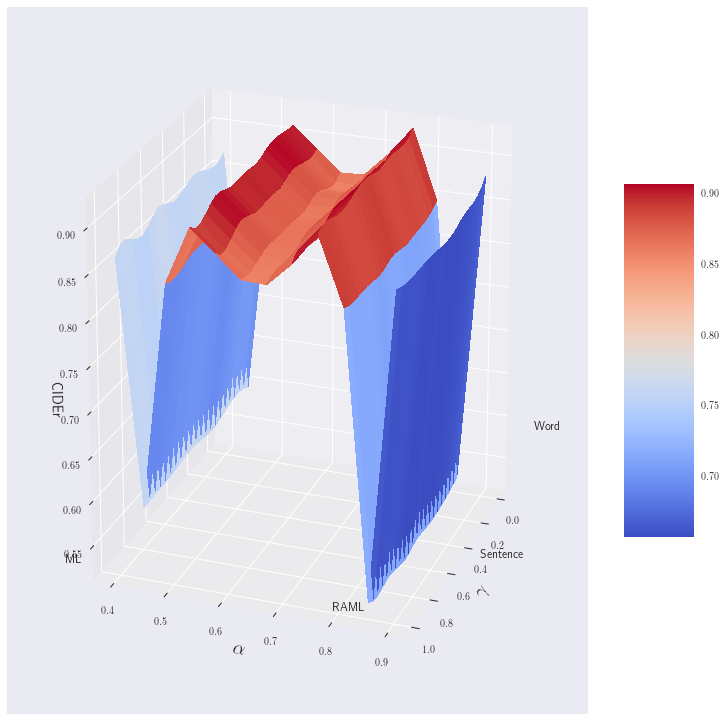

In [6]:
Gsmooth, Asmooth = np.mgrid[0:1:22j, .4:.9:12j]
tck = interpolate.bisplrep(G, A, C, s=0)
Csmooth = interpolate.bisplev(Gsmooth[:,0], Asmooth[0,:], tck)
Csmooth.shape
fig = plt.figure(figsize=(13, 13))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Gsmooth, Asmooth, Csmooth, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('$\\gamma$', fontsize=20)
ax.set_ylabel('$\\alpha$', fontsize=20)
ax.set_zlabel('CIDEr', fontsize=14)
ax.text(1.5, 0.41, .6, "ML")
ax.text(1.5, 0.88, .6, "RAML")
ax.text(1., 1.05, .6, "Sentence")
ax.text(0.01, 1., .6, "Word")
# cset = ax.contour(Gsmooth, Asmooth, Csmooth, zdir='x', offset=-.5, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(20, 20)
plt.savefig('../figures/ag_grid_smooth.png',
            dpi=300, bbox_inches='tight')

shapes: (6, 11) (6, 11) (6, 11)


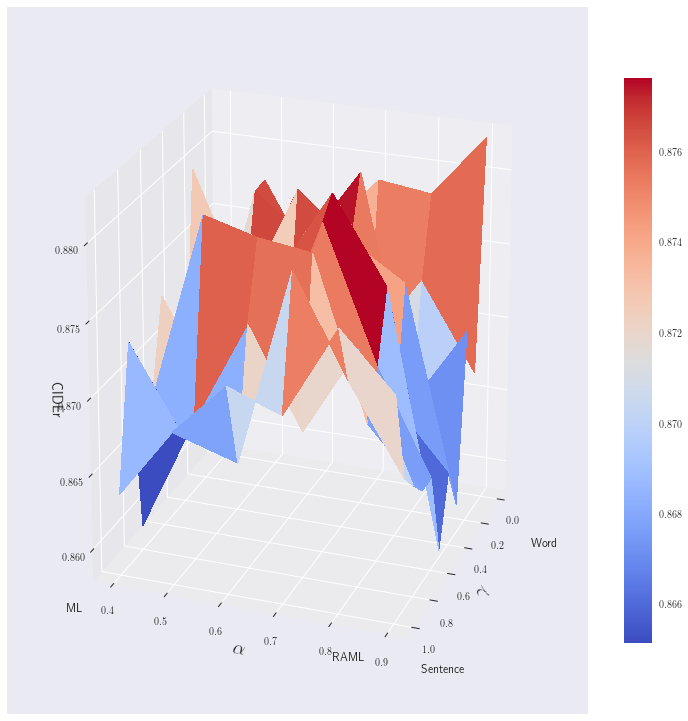

In [7]:
fig = plt.figure(figsize=(13, 13))
ax = fig.gca(projection='3d')
print('shapes:', G.shape, A.shape, C.shape)
surf = ax.plot_surface(G, A, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# cset = ax.contour(G, A, C, zdir='z', offset=.85, cmap=cm.coolwarm)
# cset = ax.contour(G, A, C, zdir='y',  offset=1.2, cmap=cm.coolwarm)

ax.set_xlabel('$\\gamma$', fontsize=20)
ax.set_ylabel('$\\alpha$', fontsize=20)
ax.set_zlabel('CIDEr', fontsize=14)
ax.text(1.5, 0.41, .86, "ML")
ax.text(1.5, 0.88, .86, "RAML")
ax.text(1., .95, .855, "Sentence")
ax.text(0.01, 1., .855, "Word")
fig.colorbar(surf, shrink=0.8)
ax.view_init(20, 20)
plt.savefig('../figures/ag_grid.png',
            dpi=300, bbox_inches='tight')

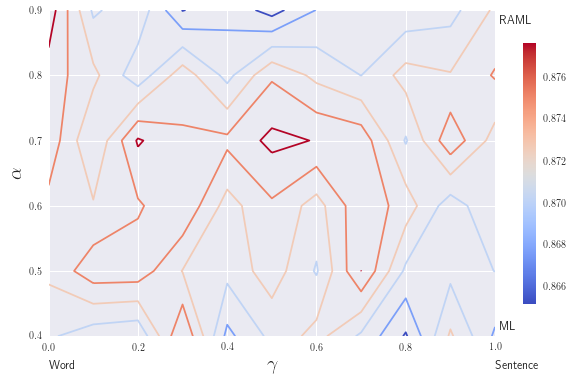

In [8]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
cset = ax.contour(G, A, C, offset=-.5, cmap=cm.coolwarm)
ax.set_xlabel('$\\gamma$', fontsize=20)
ax.set_ylabel('$\\alpha$', fontsize=20)
ax.text(1, 0.35, "Sentence")
ax.text(0, 0.35, "Word")
ax.text(1.01, 0.41, "ML")
ax.text(1.01, 0.88, "RAML")
f.colorbar(surf, shrink=.8)
plt.savefig('../figures/ag_grid_contour.png',
            dpi=300, bbox_inches='tight')

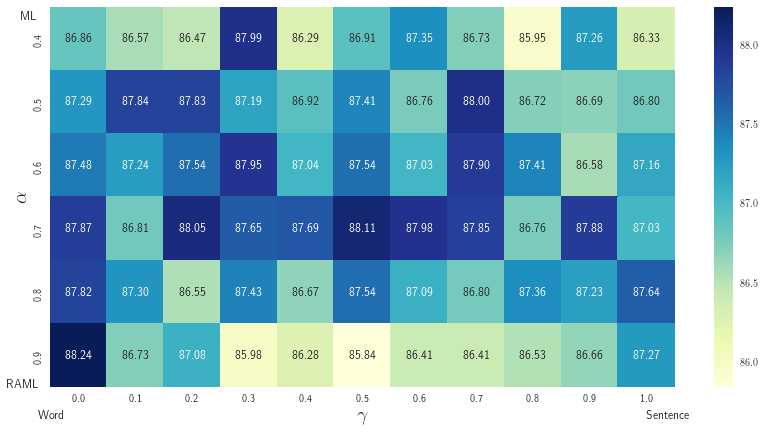

In [50]:
fig = plt.figure(figsize=(14, 7))
sns.heatmap(100 * C, annot=True, fmt=".2f", cmap="YlGnBu")
plt.xlabel('$\\gamma$', fontsize=20)
plt.ylabel('$\\alpha$', fontsize=20)
plt.xticks(np.arange(11)+.5, np.arange(11)/10)
plt.yticks(np.arange(6)+.5, .4+np.arange(6)/10)
plt.text(10.5, 6.5, "Sentence")
plt.text(-.2, 6.5, "Word")
plt.text(-.5, 0.2, "ML")
plt.text(-.75, 6, "RAML")
plt.savefig('../figures/ag_matrix.png',
            dpi=300, bbox_inches='tight')

array([[ 0.86860219,  0.8657036 ,  0.86469688,  0.87994122,  0.86288135,
         0.86910405,  0.87347047,  0.8672545 ,  0.85953428,  0.87260935,
         0.86332684],
       [ 0.8728782 ,  0.8783582 ,  0.87828303,  0.87185378,  0.86922208,
         0.8740684 ,  0.86760199,  0.88000155,  0.86721207,  0.86686652,
         0.86803584],
       [ 0.87478276,  0.87239844,  0.87543487,  0.87949376,  0.87035183,
         0.87535152,  0.87032027,  0.87901838,  0.87412155,  0.86578935,
         0.87157751],
       [ 0.87867309,  0.86813986,  0.88048354,  0.87654097,  0.87694985,
         0.88106516,  0.87979748,  0.87852732,  0.8676244 ,  0.87881257,
         0.87026784],
       [ 0.87820959,  0.87304802,  0.86546895,  0.87426882,  0.86674902,
         0.87544098,  0.87094868,  0.86795669,  0.87356787,  0.87228211,
         0.87638722],
       [ 0.88242931,  0.86729813,  0.87081245,  0.85980272,  0.86277151,
         0.85838866,  0.86409965,  0.86409107,  0.86525374,  0.86656358,
         0.872

In [13]:
# 2D grid search
lig = pickle.load(open('../Results/rescomplete_hyperion.res', 'rb'))
inria = pickle.load(open('../Results/rescomplete_clear.inrialpes.fr.res', 'rb'))

In [14]:
Res = {}
for res in lig + inria:
    aword = res[0][0]["alpha_word"]
    asent = res[0][0]["alpha_sent"]
    cid = res[0][1]["CIDEr"]
    if asent in Res:
        Res[asent][aword] = cid
    else:
        Res[asent] = {aword : cid}

In [15]:
W_1d = [.6, .7, .8, .9]  # np.linspace(0, 1, 11)
S_1d = [.3, .4, .5, .6]  # np.linspace(0.4, .9, 6)
print('words:', W_1d)
S, W = np.meshgrid(S_1d, W_1d)
C = np.zeros((len(W_1d), len(S_1d)))
print('C.shape', C.shape)
for i, (s, w) in enumerate(zip(S, W_1d)):
    for j, sw in enumerate(s):
        # print(i, j, ' >> g:', ga, "a:", a)
        try:
            C[i,j] = Res[sw][w]
        except:
            print('Subbing in word=', w, ' sent=', sw)
            C[i, j] = .86
            

words: [0.6, 0.7, 0.8, 0.9]
C.shape (4, 4)


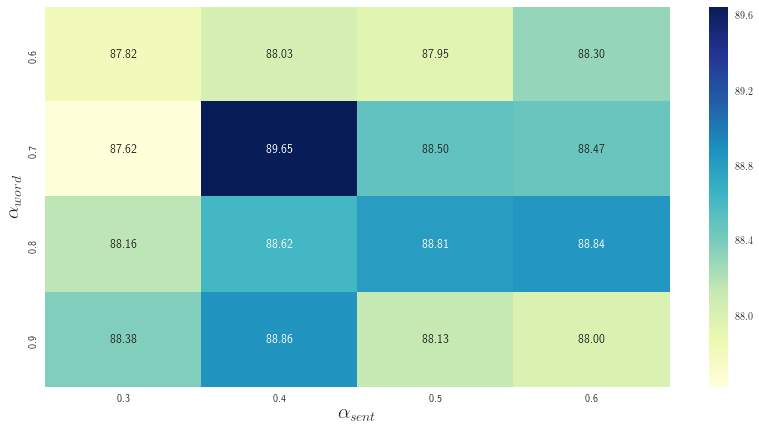

In [16]:
sns.set()
fig = plt.figure(figsize=(14, 7))
sns.heatmap(100 * C, annot=True, fmt=".2f", cmap="YlGnBu")
plt.xlabel('$\\alpha_{sent}$', fontsize=20)
plt.ylabel('$\\alpha_{word}$', fontsize=20)
plt.xticks(np.arange(len(S_1d))+.5, np.array(S_1d))
plt.yticks(np.arange(len(W_1d))+.5, np.array(W_1d))
#plt.text(10.5, 6.5, "Sentence")
#plt.text(-.2, 6.5, "Word")
#plt.text(-.5, 0.2, "ML")
#plt.text(-.75, 6, "RAML")
plt.savefig('../figures/ws_matrix.png',
            dpi=300, bbox_inches='tight')

In [100]:
Cider_fn_reset_ep0_lr = pd.read_csv("../Results/tensorboard_res/run_decore-word2_tword015_coco_idf_a09_finetune_adamreset_ep0_lr-tag-CIDEr.csv")
Cider_fn_reset = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune_adamreset-tag-CIDEr.csv")
Cider_getgo = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_CocoGlove_idf_bis_a09-tag-CIDEr.csv")
Cider_fn = pd.read_csv('../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune-tag-CIDEr.csv')

In [108]:
TML_fn_reset_ep0_lr = pd.read_csv("../Results/tensorboard_res/run_decore-word2_tword015_coco_idf_a09_finetune_adamreset_ep0_lr-tag-train_ml_loss.csv")
TML_fn_reset = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune_adamreset-tag-train_ml_loss.csv")
TML_getgo = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_CocoGlove_idf_bis_a09-tag-train_ml_loss.csv")
TML_fn = pd.read_csv('../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune-tag-train_ml_loss.csv')

In [134]:
TL_fn_reset_ep0_lr = pd.read_csv("../Results/tensorboard_res/run_decore-word2_tword015_coco_idf_a09_finetune_adamreset_ep0_lr-tag-train_loss.csv")
TL_fn_reset = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune_adamreset-tag-train_loss.csv")
TL_getgo = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_CocoGlove_idf_bis_a09-tag-train_loss.csv")
TL_fn = pd.read_csv('../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune-tag-train_loss.csv')

In [121]:
grad_fn_reset_ep0_lr = pd.read_csv("../Results/tensorboard_res/run_decore-word2_tword015_coco_idf_a09_finetune_adamreset_ep0_lr-tag-RNN_grad_norm.csv")
grad_fn_reset = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune_adamreset-tag-RNN_grad_norm.csv")
grad_getgo = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_CocoGlove_idf_bis_a09-tag-RNN_grad_norm.csv")
grad_fn = pd.read_csv('../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune-tag-RNN_grad_norm.csv')

In [139]:
lr_fn_reset_ep0_lr = pd.read_csv("../Results/tensorboard_res/run_decore-word2_tword015_coco_idf_a09_finetune_adamreset_ep0_lr-tag-learning_rate.csv")
lr_fn_reset = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune_adamreset-tag-learning_rate.csv")
lr_getgo = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_CocoGlove_idf_bis_a09-tag-learning_rate.csv")
lr_fn = pd.read_csv('../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune-tag-learning_rate.csv')

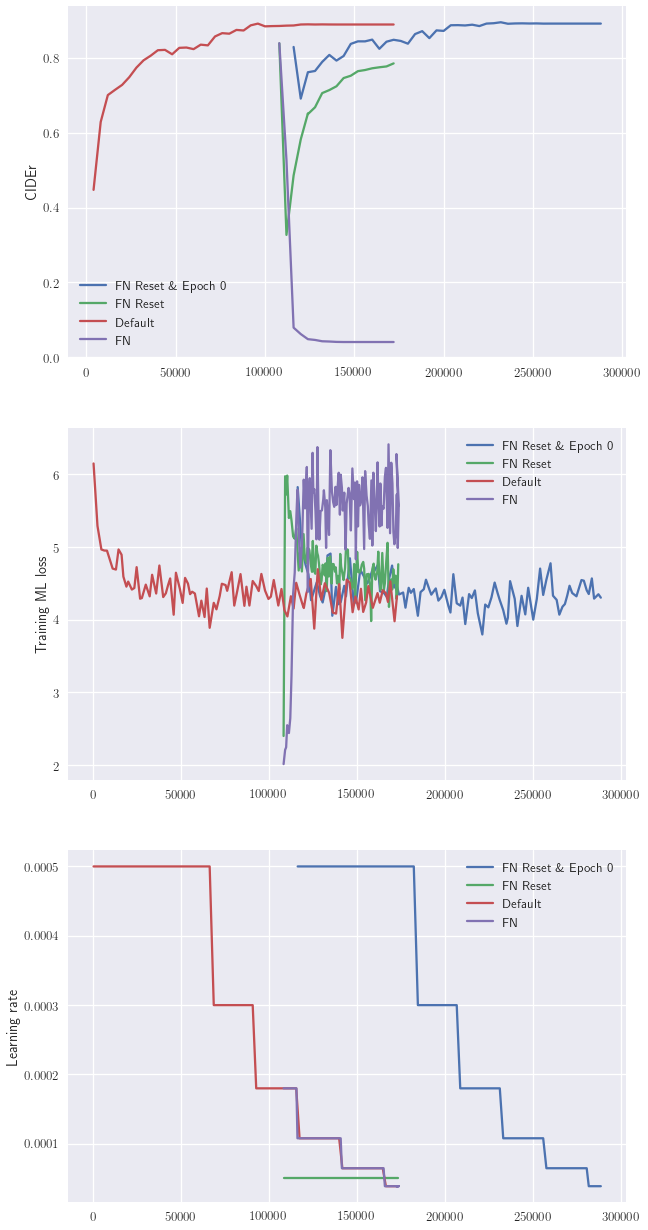

In [148]:
f, axs = plt.subplots(3, 1, figsize=(10,22))
axs[0].plot(Cider_fn_reset_ep0_lr['Step'], Cider_fn_reset_ep0_lr['Value'], label="FN Reset \& Epoch 0")
axs[0].plot(Cider_fn_reset['Step'], Cider_fn_reset['Value'], label="FN Reset")
axs[0].plot(Cider_getgo['Step'], Cider_getgo['Value'], label="Default")
axs[0].plot(Cider_fn['Step'], Cider_fn['Value'], label="FN")
axs[0].legend()
axs[0].set_ylabel('CIDEr')

axs[1].plot(TML_fn_reset_ep0_lr['Step'][::10], TML_fn_reset_ep0_lr['Value'][::10], label="FN Reset \& Epoch 0")
axs[1].plot(TML_fn_reset['Step'][::10], TML_fn_reset['Value'][::10], label="FN Reset")
axs[1].plot(TML_getgo['Step'][::10], TML_getgo['Value'][::10], label="Default")
axs[1].plot(TML_fn['Step'][::10], TML_fn['Value'][::10], label="FN")
axs[1].legend()
axs[1].set_ylabel('Training ML loss')


axs[2].plot(lr_fn_reset_ep0_lr['Step'][::10], lr_fn_reset_ep0_lr['Value'][::10], label="FN Reset \& Epoch 0")
axs[2].plot(lr_fn_reset['Step'][::10], lr_fn_reset['Value'][::10], label="FN Reset")
axs[2].plot(lr_getgo['Step'][::10], lr_getgo['Value'][::10], label="Default")
axs[2].plot(lr_fn['Step'][::10], lr_fn['Value'][::10], label="FN")
axs[2].legend()
axs[2].set_ylabel('Learning rate')


# axs[1][1].plot(TL_fn_reset_ep0_lr['Step'][::10], TL_fn_reset_ep0_lr['Value'][::10], label="FN Reset \& Epoch 0")
# axs[1][1].plot(TL_fn_reset['Step'][::10], TL_fn_reset['Value'][::10], label="FN Reset")
# axs[1][1].plot(TL_getgo['Step'][::10], TL_getgo['Value'][::10], label="Default")
# axs[1][1].plot(TL_fn['Step'][::10], TL_fn['Value'][::10], label="FN")
# axs[1][1].legend()

# axs[1][0].plot(grad_fn_reset_ep0_lr['Step'][::10], grad_fn_reset_ep0_lr['Value'][::10], label="FN Reset \& Epoch 0")
# axs[1][0].plot(grad_fn_reset['Step'][4::10], grad_fn_reset['Value'][4::10], label="FN Reset")
# axs[1][0].plot(grad_getgo['Step'][::10], grad_getgo['Value'][::10], label="Default")
# axs[1][0].plot(grad_fn['Step'][::10], grad_fn['Value'][::10], label="FN")
# axs[1][0].legend()
plt.savefig('../figures/adam_reset.png',
            dpi=300, bbox_inches='tight')

In [90]:
Cider_reset_ep0_lr

,Wall time,Step,Value
0,1.512476e+09,116000,0.828275
1,1.512478e+09,120000,0.690543
2,1.512479e+09,124000,0.760851
3,1.512480e+09,128000,0.764206
4,1.512482e+09,132000,0.788375
5,1.512483e+09,136000,0.807048
6,1.512484e+09,140000,0.791937
7,1.512485e+09,144000,0.804173
8,1.512487e+09,148000,0.836389
9,1.512488e+09,152000,0.843229
